In [1]:
import pysam
from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats
import csv
import seaborn as sns
from statannotations.Annotator import Annotator 
from adjustText import adjust_text

In [2]:
all_mean_arr=-0.019077723390066942
all_std_arr=0.006128439002438663
mean_dict_different_race={'ACB': -0.014011151662888553,
 'ASW': -0.012693412503283,
 'BEB': -0.0038608773522230016,
 'CDX': -0.000870975201046489,
 'CEU': -0.002626550761399808,
 'CHB': -0.000840617782511786,
 'CHS': -0.0016030210248706835,
 'CLM': -0.006497201413442441,
 'ESN': -0.012407888605124987,
 'FIN': -0.0013888123211964092,
 'GBR': -0.0016421960521901954,
 'GIH': -0.0029655045615120147,
 'GWD': -0.013383054011719266,
 'IBS': -0.0036274568161741316,
 'ITU': -0.003697573961398361,
 'JPT': -0.0004422965646677968,
 'KHV': -0.0014824412579579188,
 'LWK': -0.013214685221562708,
 'MSL': -0.012902619299438558,
 'MXL': -0.004064132377929528,
 'PEL': -0.0032051883341473507,
 'PJL': -0.004661546996727815,
 'PUR': -0.008252100717713692,
 'STU': -0.003961436794723387,
 'TSI': -0.002358177545570631,
 'YRI': -0.012978184004079407}
std_dict_different_race={'ACB': 0.007679014864719199,
 'ASW': 0.008041527656473924,
 'BEB': 0.008061181937627181,
 'CDX': 0.008574772155886829,
 'CEU': 0.007805712926154353,
 'CHB': 0.00858396197930932,
 'CHS': 0.008210661522162982,
 'CLM': 0.007855389049385354,
 'ESN': 0.007528169549036397,
 'FIN': 0.008233373830804186,
 'GBR': 0.008280482586380011,
 'GIH': 0.008318428884896655,
 'GWD': 0.00741808675422558,
 'IBS': 0.007946168606506706,
 'ITU': 0.007944085877932789,
 'JPT': 0.008520600208015637,
 'KHV': 0.008457471872578115,
 'LWK': 0.00775427047797345,
 'MSL': 0.00788405338804666,
 'MXL': 0.008244211463289736,
 'PEL': 0.008220014590454098,
 'PJL': 0.007728364636381623,
 'PUR': 0.007789028974214059,
 'STU': 0.007989081367465312,
 'TSI': 0.008171487042712589,
 'YRI': 0.007574843363674686}

In [3]:
#mhc互补区域
mhc_race_positions_dict={'ACB': {'mhc': [[32589647, 32805573]]},
 'ASW': {'mhc': [[29753369, 29913914],
   [29939668, 30120966],
   [32627859, 32843772]]},
 'BEB': {},
 'CDX': {'mhc': [[31295439, 31432528]]},
 'CEU': {'mhc': [[32627859, 32776791]]},
 'CHB': {},
 'CHS': {'mhc': [[32589647, 32716541]]},
 'CLM': {'mhc': [[32453110, 32577355], [32589647, 32732048]]},
 'ESN': {'mhc': [[29720403, 29896285], [32644320, 32843772]]},
 'FIN': {},
 'GBR': {'mhc': [[32453110, 32577355]]},
 'GIH': {'mhc': [[32589647, 32698571]]},
 'GWD': {'mhc': [[29720403, 29913914],
   [29939668, 30085606],
   [32627859, 32732048]]},
 'IBS': {'mhc': [[32453110, 32577355], [32589647, 32716541]]},
 'ITU': {'mhc': [[32423532, 32554290]]},
 'JPT': {'mhc': [[32589647, 32732048]]},
 'KHV': {'mhc': [[32453110, 32577355], [32589647, 32716541]]},
 'LWK': {'mhc': [[32627859, 32805573]]},
 'MSL': {'mhc': [[29720403, 29913914],
   [31317765, 31528792],
   [32554291, 32776791]]},
 'MXL': {'mhc': [[32589647, 32716541]]},
 'PEL': {'mhc': [[32473902, 32616414]]},
 'PJL': {},
 'PUR': {'mhc': [[32589647, 32683157]]},
 'STU': {'mhc': [[32453110, 32577355], [32589647, 32716541]]},
 'TSI': {'mhc': [[32589647, 32698571]]},
 'YRI': {'mhc': [[29720403, 29913914],
   [29939668, 30120966],
   [32589647, 32882258]]}}

In [4]:

#mhc complementary region
mhc_complementary_region=[[32453110, 32577355], [32589647, 32716541]]

In [5]:
split_all_region={'split_chr14_xaa': [[19806333, 19976578]],
 'split_chr7_xbc': [[124810550, 125070920]],
 'split_chr1_xak': [[45762038, 46100296]],
 'split_chr1_xbk': [[188243362, 188513984]]}

In [6]:
split_race_region={'ACB': {'split_chr2/xau': [[89762579, 89852967]],
  'split_chr5/xaa': [[676694, 846549]],
  'split_chr7/xan': [[56467013, 56713542]],
  'split_chr11/xaw': [[103206633, 103451621]],
  'split_chr14/xaa': [[19806333, 19976578]],
  'split_chr21/xaa': [[10605321, 10733724]]},
 'ASW': {'split_chr2/xau': [[89762579, 89852967]],
  'split_chr5/xaa': [[676694, 846549]],
  'split_chr9/xak': [[42796452, 42969270]],
  'split_chr10/xaj': [[38491573, 38687800], [38725237, 38832458]],
  'split_chr11/xaf': [[23272931, 23495433]],
  'split_chr13/xaa': [[18347994, 18534139]],
  'split_chr14/xak': [[66346187, 66752333]],
  'split_chr21/xaa': [[10605321, 10733724]]},
 'BEB': {'split_chr1/xbx': [[245939605, 246162003]],
  'split_chr2/xan': [[56405225, 56644106]],
  'split_chr3/xav': [[98046342, 98273693]],
  'split_chr3/xbf': [[145365797, 145612467]],
  'split_chr4/xaz': [[115247002, 115485969]],
  'split_chr13/xai': [[55102733, 55443491]],
  'split_chr14/xaa': [[19806333, 19976578]]},
 'CDX': {'split_chr1/xay': [[114816228, 115116610]],
  'split_chr2/xbd': [[130125757, 130339027]],
  'split_chr4/xba': [[119293026, 119539168]],
  'split_chr6/xao': [[64160994, 64523871]],
  'split_chr7/xaf': [[19734421, 19953255]],
  'split_chr9/xau': [[105652970, 105876427]],
  'split_chr10/xan': [[55664607, 55894887]],
  'split_chr12/xbc': [[131390693, 131619328]],
  'split_chr13/xai': [[55102733, 55354096]],
  'split_chr17/xag': [[31068982, 31384157]],
  'split_chr18/xan': [[65996302, 66233011]]},
 'CEU': {'split_chr1/xbe': [[158399387, 158641706]],
  'split_chr6/xac': [[8413699, 8649798]],
  'split_chr7/xbc': [[124810550, 125070920]],
  'split_chr11/xaf': [[24934206, 25144712]],
  'split_chr12/xac': [[10962097, 11205540]],
  'split_chr17/xaf': [[21588491, 21823237]],
  'split_chr17/xaj': [[45620566, 46418024]]},
 'CHB': {'split_chr2/xbd': [[130125757, 130339027]],
  'split_chr4/xba': [[119293026, 119587470]],
  'split_chr4/xaz': [[115247002, 115485969]],
  'split_chr6/xao': [[64202650, 64523871]],
  'split_chr7/xbc': [[124810550, 125070920]],
  'split_chr7/xaf': [[19775051, 19953255]],
  'split_chr10/xar': [[73060579, 73337762]],
  'split_chr11/xav': [[98072700, 98330585]],
  'split_chr22/xaa': [[16175432, 16345129]]},
 'CHS': {'split_chr3/xav': [[98046342, 98245327]],
  'split_chr4/xba': [[119293026, 119539168]],
  'split_chr5/xaa': [[676694, 846549]],
  'split_chr6/xao': [[64202650, 64523871]],
  'split_chr7/xbc': [[124810550, 125070920]],
  'split_chr8/xaz': [[109058766, 109345554]],
  'split_chr14/xat': [[105509278, 105695533]]},
 'CLM': {'split_chr1/xbd': [[152162701, 152471006]],
  'split_chr3/xav': [[95059735, 95322404], [98046342, 98273693]],
  'split_chr3/xbj': [[163862679, 164224214]],
  'split_chr4/xba': [[119293026, 119587470]],
  'split_chr6/xab': [[7345120, 7558507]],
  'split_chr6/xar': [[76169005, 76460170]],
  'split_chr7/xbc': [[124810550, 125070920]],
  'split_chr12/xan': [[61013177, 61213757]],
  'split_chr14/xaa': [[19806333, 19976578]],
  'split_chr14/xat': [[106520496, 106674883]]},
 'ESN': {'split_chr2/xau': [[89581761, 89852967]],
  'split_chr5/xaa': [[676694, 846549]],
  'split_chr5/xai': [[34311870, 34562837]],
  'split_chr6/xbf': [[145443018, 145762353]],
  'split_chr7/xap': [[67044394, 67267582]],
  'split_chr14/xan': [[80889782, 81152442]],
  'split_chr21/xaa': [[10605321, 10733724]]},
 'FIN': {'split_chr3/xbj': [[163862679, 164147845]],
  'split_chr4/xaw': [[97892649, 98142264]],
  'split_chr4/xbh': [[151414350, 151728888]],
  'split_chr6/xat': [[85153819, 85387984]],
  'split_chr6/xbf': [[145485121, 145762353]],
  'split_chr7/xbc': [[124810550, 125070920]],
  'split_chr8/xaz': [[109010721, 109345554]],
  'split_chr9/xav': [[112161299, 112408537]],
  'split_chr11/xbb': [[124171937, 124450010]],
  'split_chr18/xac': [[12017790, 12244103]]},
 'GBR': {'split_chr1/xak': [[45628366, 46147211]],
  'split_chr2/xan': [[56405225, 56644106]],
  'split_chr2/xas': [[78325225, 78577282]],
  'split_chr3/xbf': [[145365797, 145612467]],
  'split_chr3/xbi': [[158122703, 158435520]],
  'split_chr4/xba': [[119243365, 119539168]],
  'split_chr6/xac': [[8413699, 8649798]],
  'split_chr7/xbc': [[124760998, 125070920]],
  'split_chr11/xbb': [[124171937, 124450010]],
  'split_chr12/xac': [[10962097, 11205540]],
  'split_chr17/xaf': [[21654230, 21823237]],
  'split_chr17/xaj': [[45587933, 46418024]]},
 'GIH': {'split_chr3/xav': [[98046342, 98276757]],
  'split_chr4/xbd': [[132580391, 132816794]],
  'split_chr6/xac': [[8413699, 8649798]],
  'split_chr11/xah': [[34650776, 34905225]],
  'split_chr14/xaa': [[19806333, 20015421]],
  'split_chr18/xac': [[12017790, 12244103]]},
 'GWD': {'split_chr1/xak': [[45803471, 46100296]],
  'split_chr2/xai': [[38264369, 38464894]],
  'split_chr2/xau': [[89762579, 89852967]],
  'split_chr5/xaa': [[676694, 846549]],
  'split_chr13/xaa': [[18347994, 18534139]],
  'split_chr21/xaa': [[10511846, 10763989]]},
 'IBS': {'split_chr3/xbf': [[145365797, 145612467]],
  'split_chr6/xbf': [[145485121, 145762353]],
  'split_chr12/xac': [[10962097, 11205540]],
  'split_chr12/xas': [[83579779, 83843102]],
  'split_chr17/xaf': [[21619971, 21823237]],
  'split_chr17/xaj': [[45836662, 46418024]],
  'split_chr18/xac': [[12017790, 12244103]],
  'split_chr22/xaa': [[16131708, 16345129]]},
 'ITU': {'split_chr5/xas': [[84862293, 85266031]],
  'split_chr10/xan': [[55664607, 55894887]],
  'split_chr12/xac': [[10962097, 11162840]],
  'split_chr14/xaa': [[19806333, 20047342]],
  'split_chr17/xak': [[52575391, 52889013]]},
 'JPT': {'split_chr3/xav': [[98046342, 98245327]],
  'split_chr5/xbc': [[131688028, 132052794]],
  'split_chr5/xaa': [[676694, 825167]],
  'split_chr13/xaa': [[18347994, 18534139]],
  'split_chr13/xap': [[85638733, 85884384]],
  'split_chr14/xad': [[31681845, 31909184]],
  'split_chr22/xaa': [[16175432, 16345129]]},
 'KHV': {'split_chr2/xbq': [[192771748, 193054217]],
  'split_chr3/xav': [[98046342, 98245327]],
  'split_chr3/xbj': [[163946649, 164185047]],
  'split_chr4/xba': [[119293026, 119539168]],
  'split_chr7/xbc': [[124810550, 125070920]],
  'split_chr14/xak': [[66298204, 66793088]]},
 'LWK': {'split_chr2/xai': [[38235897, 38464894]],
  'split_chr2/xau': [[89762579, 89852967]],
  'split_chr5/xaa': [[676694, 846549]],
  'split_chr13/xaa': [[18347994, 18534139]],
  'split_chr14/xak': [[66346187, 66752333]],
  'split_chr21/xaa': [[10605321, 10733724]]},
 'MSL': {'split_chr1/xak': [[45803471, 46100296]],
  'split_chr2/xau': [[89762579, 89852967]],
  'split_chr5/xay': [[113365150, 113639918]],
  'split_chr7/xaf': [[19775051, 19953255]],
  'split_chr7/xap': [[67044394, 67267582]],
  'split_chr9/xak': [[42796452, 42969270]],
  'split_chr11/xaf': [[23272931, 23495433]],
  'split_chr11/xaw': [[103206633, 103451621]],
  'split_chr13/xaa': [[18347994, 18534139]],
  'split_chr14/xat': [[105569851, 105695533]],
  'split_chr21/xaa': [[10605321, 10733724]]},
 'MXL': {'split_chr3/xav': [[98046342, 98217489]],
  'split_chr3/xaq': [[74901608, 75192541]],
  'split_chr5/xad': [[11999758, 12263260]],
  'split_chr6/xao': [[64160994, 64404669]],
  'split_chr7/xbc': [[124810550, 125070920]],
  'split_chr11/xaf': [[23200593, 23461651]],
  'split_chr12/xad': [[14846240, 15093187]],
  'split_chr12/xac': [[10962097, 11162840]],
  'split_chr12/xap': [[73338587, 73586502]],
  'split_chr12/xas': [[83579779, 83843102]],
  'split_chr17/xaf': [[21654230, 21823237]]},
 'PEL': {'split_chr1/xak': [[45628366, 46147211]],
  'split_chr2/xbo': [[186062200, 186331668]],
  'split_chr3/xav': [[98046342, 98217489]],
  'split_chr3/xba': [[120872663, 121116904]],
  'split_chr4/xaq': [[69225334, 69589122]],
  'split_chr6/xab': [[7345120, 7695065]],
  'split_chr8/xba': [[112137591, 112486758]],
  'split_chr10/xaq': [[68153912, 68481883]],
  'split_chr11/xaf': [[23168664, 23461651]],
  'split_chr11/xam': [[58630320, 58868016]],
  'split_chr12/xac': [[10962097, 11162840]],
  'split_chr12/xas': [[83579779, 83843102]],
  'split_chr14/xaa': [[19806333, 19976578]],
  'split_chr16/xab': [[5659954, 5828695]]},
 'PJL': {'split_chr12/xac': [[10962097, 11162840]],
  'split_chr14/xac': [[28519266, 28761965]],
  'split_chr14/xaa': [[19806333, 20078222]],
  'split_chr17/xak': [[52575391, 52861780]]},
 'PUR': {'split_chr3/xav': [[98003499, 98273693]],
  'split_chr3/xbj': [[163819938, 164063747]],
  'split_chr12/xac': [[10962097, 11205540]],
  'split_chr12/xan': [[61013177, 61213757]],
  'split_chr12/xas': [[83689105, 83928389]],
  'split_chr17/xaf': [[21654230, 21823237]]},
 'STU': {'split_chr3/xav': [[98046342, 98273693]],
  'split_chr7/xbc': [[124810550, 125070920]],
  'split_chr13/xaa': [[18347994, 18534139]],
  'split_chr13/xai': [[55102733, 55443491]],
  'split_chr14/xaa': [[19806333, 19976578]],
  'split_chr16/xaj': [[48512974, 48799209]],
  'split_chr19/xam': [[51801039, 52098595]]},
 'TSI': {'split_chr4/xaw': [[97892649, 98189302]],
  'split_chr4/xba': [[119293026, 119539168]],
  'split_chr7/xag': [[23951217, 24204307]],
  'split_chr7/xbc': [[124810550, 125070920]],
  'split_chr9/xai': [[31957257, 32172669]],
  'split_chr12/xac': [[10962097, 11162840]],
  'split_chr14/xaa': [[19806333, 19976578]],
  'split_chr17/xaf': [[21654230, 21823237]],
  'split_chr17/xaj': [[45836662, 46544765]]},
 'YRI': {'split_chr2/xau': [[89762579, 89852967]],
  'split_chr5/xaa': [[676694, 846549]],
  'split_chr7/xan': [[56467013, 56713542]],
  'split_chr7/xap': [[67044394, 67267582]],
  'split_chr9/xak': [[42796452, 42969270]],
  'split_chr13/xaa': [[18347994, 18534139]],
  'split_chr16/xao': [[72288822, 72684953]],
  'split_chr21/xaa': [[10605321, 10733724]]}}

In [7]:
fileName = '../../1000_population.tsv'


lines = []
categories = []
samplenames=[]

with open(fileName, 'r') as f:
    text = f.read()

lines = text.split('\n')
for l in lines:
    samplenames.append(l.split('\t')[0])
    categories.append(l.split('\t')[-1])
allcategories=sorted(list(set(categories)))


In [8]:
def getmaxindex(arr,num):
    max_values_and_indices = sorted(enumerate(arr), key=lambda x: x[1], reverse=True)[:num]


    max_indices = [index for index, value in max_values_and_indices]    
    return max_indices

In [9]:
import re
def getinteger(s):
    match = re.search(r'chr(\d+)', s)

    if match:
        return match.group(1)


In [10]:
allrecords=[]

In [11]:
mhccsv = pd.read_csv("../../csvfiles/posmhc.csv")
allrigion_P_top_1000=[]
for region in mhc_complementary_region:

    mhccsv_P_list = mhccsv[(mhccsv["Unnamed: 0"] >= region[0]) & (mhccsv["Unnamed: 0"] <= region[1])]["P"].to_list()
    allrigion_P_top_1000+=mhccsv_P_list
#allrigion_P_top_1000_index=getmaxindex(allrigion_P_top_1000,1000)
sortedlist=sorted(allrigion_P_top_1000,reverse=True)
print(sortedlist)
top_1000=sortedlist[:1000]
for i in top_1000:
    arr=[]
    arr.append("Disassortative mating MHC region")
    arr.append("All")
   # pvalue=stats.norm.cdf(i, all_mean_arr, all_std_arr)
    arr.append(i)
    allrecords.append(arr)
# sortedlist=allrigion_P_top_1000.sort(reverse=True)
# top_1000=sortedlist[:1000]
# mean_of_top_1000 = sum(top_1000) / len(top_1000)
# allrecords.append(["MHC complementary region","Allaverage",mean_of_top_1000])
allrecords
    



[0.6632486326477401, 0.6239365674469136, 0.6076417243908143, 0.6008135583469729, 0.5872157323734027, 0.5827772911231764, 0.5819819924108495, 0.5806313936183056, 0.5790656337525245, 0.5770429050001379, 0.5752330592341374, 0.5713656502776171, 0.5711790239046683, 0.5611068486301712, 0.56023587881622, 0.5593579363010297, 0.5590825055213804, 0.5585711375772008, 0.5566686908258711, 0.5507305786772899, 0.5481470108371156, 0.5465334166146159, 0.5439907886924195, 0.5434230643977173, 0.5391913951099288, 0.537268002769465, 0.5347795906116917, 0.53421465259501, 0.5313414330462302, 0.5263594890246037, 0.5247039417430548, 0.523794406411175, 0.522613979888888, 0.5215214595325735, 0.5191330934577617, 0.518804004945976, 0.5177549318762237, 0.516366185494189, 0.5122048372788077, 0.5099166195872074, 0.5088542073576606, 0.5065135168012731, 0.5040275619154699, 0.5028378878323571, 0.499474796215633, 0.4972390159126036, 0.4969745145248043, 0.4963547142579023, 0.4956846344565903, 0.4950000137366876, 0.4946053

[['Disassortative mating MHC region', 'All', 0.6632486326477401],
 ['Disassortative mating MHC region', 'All', 0.6239365674469136],
 ['Disassortative mating MHC region', 'All', 0.6076417243908143],
 ['Disassortative mating MHC region', 'All', 0.6008135583469729],
 ['Disassortative mating MHC region', 'All', 0.5872157323734027],
 ['Disassortative mating MHC region', 'All', 0.5827772911231764],
 ['Disassortative mating MHC region', 'All', 0.5819819924108495],
 ['Disassortative mating MHC region', 'All', 0.5806313936183056],
 ['Disassortative mating MHC region', 'All', 0.5790656337525245],
 ['Disassortative mating MHC region', 'All', 0.5770429050001379],
 ['Disassortative mating MHC region', 'All', 0.5752330592341374],
 ['Disassortative mating MHC region', 'All', 0.5713656502776171],
 ['Disassortative mating MHC region', 'All', 0.5711790239046683],
 ['Disassortative mating MHC region', 'All', 0.5611068486301712],
 ['Disassortative mating MHC region', 'All', 0.56023587881622],
 ['Disassort

In [12]:
all_non_rigion_P_top_1000=[]
for key,value in split_all_region.items():
    chr=getinteger(key)
    # if chr==6:#29720403, 33129982
    #     filename="pos_prob_"+key+".csv"
    #     split_region_df=pd.read_csv("../../csvfiles/"+filename)
    #     for region in value:
    #         split_region_P_list=split_region_df[(split_region_df["Unnamed: 0"]>=region[0]) & (split_region_df["Unnamed: 0"]<=region[1])]["P"].to_list()
    #         all_non_rigion_P_top_1000+=split_region_P_list
    # else:
    filename="pos_prob_"+key+".csv"
    split_region_df=pd.read_csv("../../csvfiles/"+filename)
    for region in value:
        split_region_P_list=split_region_df[(split_region_df["Unnamed: 0"]>=region[0]) & (split_region_df["Unnamed: 0"]<=region[1])]["P"].to_list()
        all_non_rigion_P_top_1000+=split_region_P_list
sortedlist=sorted(all_non_rigion_P_top_1000,reverse=True)
print(sortedlist)
top_1000=sortedlist[:1000]
# for region in mhc_complementary_region:
#     mhccsv_P_list = mhccsv[(mhccsv["Unnamed: 0"] < region[0]) | (mhccsv["Unnamed: 0"] > region[1])]["P"].to_list()
#     all_non_rigion_P_top_1000+=mhccsv_P_list
# sortedlist=sorted(all_non_rigion_P_top_1000,reverse=True)
# print(sortedlist)
# top_1000=sortedlist[:1000]
for i in top_1000:
    arr=[]
    arr.append("Disassortative mating non-MHC region")
    arr.append("All")
   # pvalue=stats.norm.cdf(i, all_mean_arr, all_std_arr)
    arr.append(i)
    allrecords.append(arr)
allrecords

[0.6377264209868831, 0.5921299188007495, 0.5604338895357579, 0.5598260996812762, 0.5596502186133666, 0.5590847262791542, 0.5576029390973831, 0.556951580252079, 0.5562559495771336, 0.55408052501031, 0.5538141452499628, 0.5533857182348693, 0.5524267578838005, 0.55199693657724, 0.5506113389993335, 0.550548735471567, 0.5499260443964604, 0.5499260443964604, 0.5491781475547687, 0.5389853330593547, 0.5375718367081455, 0.5302060063434192, 0.528332913147266, 0.5265313880290675, 0.5248535241126927, 0.5244920971277092, 0.5226813054227755, 0.5215253554389194, 0.5207201361641753, 0.5184259837601499, 0.5178292171966421, 0.5159275452841974, 0.5149377809757193, 0.5111007135437646, 0.5090241062422335, 0.5062116801700899, 0.5055000854115377, 0.500854263088613, 0.4993753903810118, 0.4970111169105479, 0.4970111169105479, 0.4961943067342594, 0.4952607028232928, 0.4912554653341661, 0.491007947438463, 0.490630855715178, 0.4904501983504661, 0.4883276270244441, 0.4882680028465125, 0.488149700348938, 0.48644792

[['Disassortative mating MHC region', 'All', 0.6632486326477401],
 ['Disassortative mating MHC region', 'All', 0.6239365674469136],
 ['Disassortative mating MHC region', 'All', 0.6076417243908143],
 ['Disassortative mating MHC region', 'All', 0.6008135583469729],
 ['Disassortative mating MHC region', 'All', 0.5872157323734027],
 ['Disassortative mating MHC region', 'All', 0.5827772911231764],
 ['Disassortative mating MHC region', 'All', 0.5819819924108495],
 ['Disassortative mating MHC region', 'All', 0.5806313936183056],
 ['Disassortative mating MHC region', 'All', 0.5790656337525245],
 ['Disassortative mating MHC region', 'All', 0.5770429050001379],
 ['Disassortative mating MHC region', 'All', 0.5752330592341374],
 ['Disassortative mating MHC region', 'All', 0.5713656502776171],
 ['Disassortative mating MHC region', 'All', 0.5711790239046683],
 ['Disassortative mating MHC region', 'All', 0.5611068486301712],
 ['Disassortative mating MHC region', 'All', 0.56023587881622],
 ['Disassort

In [13]:
mhcracecsv=pd.read_csv("../../race/mhc.csv")

for race in allcategories:
    all_different_race_region_top_1000=[]
    if mhc_race_positions_dict[race]!={}:
        for region in mhc_race_positions_dict[race]["mhc"]:
            mhccsv_P_list = mhcracecsv[(mhcracecsv["Unnamed: 0"] >= region[0]) & (mhcracecsv["Unnamed: 0"] <= region[1])][race].to_list()
            all_different_race_region_top_1000+=mhccsv_P_list
            #print(all_different_race_region_top_1000)
        sortedlist=sorted(all_different_race_region_top_1000,reverse=True)
        print(sortedlist)
        top_1000=sortedlist[:1000]
        for i in top_1000:
            arr=[]
            arr.append("Disassortative mating MHC region")
            arr.append(race)
           # pvalue=stats.norm.cdf(i, mean_dict_different_race[race], std_dict_different_race[race])
            arr.append(i)
            allrecords.append(arr)

allrecords
        

[0.9799474508977808, 0.9799474508977808, 0.8860906995015336, 0.7575341340356602, 0.626660599833878, 0.6123823419100393, 0.5930980400781575, 0.5930980400781575, 0.5930980400781575, 0.5740151205144413, 0.568921447876865, 0.5671134277762585, 0.5543239252300901, 0.5476976481730086, 0.5363676935119736, 0.5270370480483524, 0.5138547809673504, 0.4907471745534905, 0.4907471745534905, 0.4879029184170292, 0.4721957152226793, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0.4710251714075477, 0

[['Disassortative mating MHC region', 'All', 0.6632486326477401],
 ['Disassortative mating MHC region', 'All', 0.6239365674469136],
 ['Disassortative mating MHC region', 'All', 0.6076417243908143],
 ['Disassortative mating MHC region', 'All', 0.6008135583469729],
 ['Disassortative mating MHC region', 'All', 0.5872157323734027],
 ['Disassortative mating MHC region', 'All', 0.5827772911231764],
 ['Disassortative mating MHC region', 'All', 0.5819819924108495],
 ['Disassortative mating MHC region', 'All', 0.5806313936183056],
 ['Disassortative mating MHC region', 'All', 0.5790656337525245],
 ['Disassortative mating MHC region', 'All', 0.5770429050001379],
 ['Disassortative mating MHC region', 'All', 0.5752330592341374],
 ['Disassortative mating MHC region', 'All', 0.5713656502776171],
 ['Disassortative mating MHC region', 'All', 0.5711790239046683],
 ['Disassortative mating MHC region', 'All', 0.5611068486301712],
 ['Disassortative mating MHC region', 'All', 0.56023587881622],
 ['Disassort

In [14]:

for k,vs in split_race_region.items():
    all_different_race_nonregion_top_1000=[]
    for key, value in vs.items():
        chr=getinteger(key)
        # if chr==6:#29720403, 33129982
        #     print(key.split("/")[0])
        #     print(key.split("/")[1])
        #     midstr=key.split("/")[0]+"_"+key.split("/")[1]

        #     filename=midstr+".csv"
        #     split_region_df=pd.read_csv("../../race/"+filename)
        #     for region in value:
        #         split_region_P_list=split_region_df[(split_region_df["Unnamed: 0"]>=region[0]) & (split_region_df["Unnamed: 0"]<=region[1])][race].to_list()
        #         all_different_race_nonregion_top_1000+=split_region_P_list
        # else:
        midstr=key.split("/")[0]+"_"+key.split("/")[1]
        filename=midstr+".csv"
        split_region_df=pd.read_csv("../../race/"+filename)
        for region in value:
            split_region_P_list=split_region_df[(split_region_df["Unnamed: 0"]>=region[0]) & (split_region_df["Unnamed: 0"]<=region[1])][race].to_list()
            all_different_race_nonregion_top_1000+=split_region_P_list
       # print(all_different_race_nonregion_top_1000)
       # print(len(all_different_race_nonregion_top_1000))
    sortedlist=sorted(all_different_race_nonregion_top_1000,reverse=True)
    top_1000=sortedlist[:1000]
    for i in top_1000:
        arr=[]
        arr.append("Disassortative mating non-MHC region")
        arr.append(k)
        #  pvalue=stats.norm.cdf(i, mean_dict_different_race[race], std_dict_different_race[race])
        arr.append(i)
        allrecords.append(arr)
# for race in allcategories:
#     all_different_race_nonregion_top_1000=[]
#     if mhc_race_positions_dict[race]!={}:
#         for region in mhc_race_positions_dict[race]["mhc"]:
#             mhccsv_P_list = mhcracecsv[(mhcracecsv["Unnamed: 0"] < region[0]) | (mhcracecsv["Unnamed: 0"] > region[1])][race].to_list()
#             all_different_race_nonregion_top_1000+=mhccsv_P_list
#         sortedlist=sorted(all_different_race_nonregion_top_1000,reverse=True)
#         top_1000=sortedlist[:1000]
#         for i in top_1000:
#             arr=[]
#             arr.append("MHC non-complementary region")
#             arr.append(race)
#           #  pvalue=stats.norm.cdf(i, mean_dict_different_race[race], std_dict_different_race[race])
#             arr.append(i)
#             allrecords.append(arr)

allrecords

[['Disassortative mating MHC region', 'All', 0.6632486326477401],
 ['Disassortative mating MHC region', 'All', 0.6239365674469136],
 ['Disassortative mating MHC region', 'All', 0.6076417243908143],
 ['Disassortative mating MHC region', 'All', 0.6008135583469729],
 ['Disassortative mating MHC region', 'All', 0.5872157323734027],
 ['Disassortative mating MHC region', 'All', 0.5827772911231764],
 ['Disassortative mating MHC region', 'All', 0.5819819924108495],
 ['Disassortative mating MHC region', 'All', 0.5806313936183056],
 ['Disassortative mating MHC region', 'All', 0.5790656337525245],
 ['Disassortative mating MHC region', 'All', 0.5770429050001379],
 ['Disassortative mating MHC region', 'All', 0.5752330592341374],
 ['Disassortative mating MHC region', 'All', 0.5713656502776171],
 ['Disassortative mating MHC region', 'All', 0.5711790239046683],
 ['Disassortative mating MHC region', 'All', 0.5611068486301712],
 ['Disassortative mating MHC region', 'All', 0.56023587881622],
 ['Disassort

In [15]:
def generatedf(columns,allrecords):
    dictforDF=dict()
    for i in range(len(columns)):
        midarr=[]
        for record in allrecords:           
            midarr.append(record[i])
        dictforDF[columns[i]]=midarr
    #dataframe(dictforDF).to_csv("../formalcsvs/csv2newnew_withall.csv")
    return dataframe(dictforDF)

In [16]:
samplesdf=generatedf(columns=["iscomplementary","Race","Pvalue"],allrecords=allrecords)


In [17]:
significanceComparisons=[]
significanceComparisons.append((('All','Disassortative mating MHC region'),("All","Disassortative mating non-MHC region")))
for race in allcategories:
    if mhc_race_positions_dict[race]!={}:
        t1=(race,"Disassortative mating MHC region")
        t2=(race,"Disassortative mating non-MHC region")
        significanceComparisons.append((t1,t2))


In [18]:
significanceComparisons

[(('All', 'Disassortative mating MHC region'),
  ('All', 'Disassortative mating non-MHC region')),
 (('ACB', 'Disassortative mating MHC region'),
  ('ACB', 'Disassortative mating non-MHC region')),
 (('ASW', 'Disassortative mating MHC region'),
  ('ASW', 'Disassortative mating non-MHC region')),
 (('CDX', 'Disassortative mating MHC region'),
  ('CDX', 'Disassortative mating non-MHC region')),
 (('CEU', 'Disassortative mating MHC region'),
  ('CEU', 'Disassortative mating non-MHC region')),
 (('CHS', 'Disassortative mating MHC region'),
  ('CHS', 'Disassortative mating non-MHC region')),
 (('CLM', 'Disassortative mating MHC region'),
  ('CLM', 'Disassortative mating non-MHC region')),
 (('ESN', 'Disassortative mating MHC region'),
  ('ESN', 'Disassortative mating non-MHC region')),
 (('GBR', 'Disassortative mating MHC region'),
  ('GBR', 'Disassortative mating non-MHC region')),
 (('GIH', 'Disassortative mating MHC region'),
  ('GIH', 'Disassortative mating non-MHC region')),
 (('GWD', 

In [19]:
orders=["All"]
for race in allcategories:
    if mhc_race_positions_dict[race]!={}:
        orders.append(race)
orders

['All',
 'ACB',
 'ASW',
 'CDX',
 'CEU',
 'CHS',
 'CLM',
 'ESN',
 'GBR',
 'GIH',
 'GWD',
 'IBS',
 'ITU',
 'JPT',
 'KHV',
 'LWK',
 'MSL',
 'MXL',
 'PEL',
 'PUR',
 'STU',
 'TSI',
 'YRI']

In [20]:
samplesdf.to_csv("../../samples_df.csv")

In [21]:
samplesdf = samplesdf.rename(columns={'Pvalue': 'P'})


In [22]:
samplesdf

iscomplementary Race         P
0          Disassortative mating MHC region  All  0.663249
1          Disassortative mating MHC region  All  0.623937
2          Disassortative mating MHC region  All  0.607642
3          Disassortative mating MHC region  All  0.600814
4          Disassortative mating MHC region  All  0.587216
...                                     ...  ...       ...
49995  Disassortative mating non-MHC region  YRI  0.610073
49996  Disassortative mating non-MHC region  YRI  0.610073
49997  Disassortative mating non-MHC region  YRI  0.610073
49998  Disassortative mating non-MHC region  YRI  0.610073
49999  Disassortative mating non-MHC region  YRI  0.610073

[50000 rows x 3 columns]

In [23]:
samplesdf.to_csv("../../samplesdf.csv")

GIH_Disassortative mating MHC region vs. GIH_Disassortative mating non-MHC region: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.078e-147 U_stat=1.669e+05
GWD_Disassortative mating MHC region vs. GWD_Disassortative mating non-MHC region: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:0.000e+00 U_stat=1.186e+04
IBS_Disassortative mating MHC region vs. IBS_Disassortative mating non-MHC region: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.532e-190 U_stat=1.207e+05
ITU_Disassortative mating MHC region vs. ITU_Disassortative mating non-MHC region: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.173e-183 U_stat=1.272e+05
JPT_Disassortative mating MHC region vs. JPT_Disassortative mating non-MHC region: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.672e-151 U_stat=1.619e+05
KHV_Disassortative mating MHC region vs. KHV_Disass

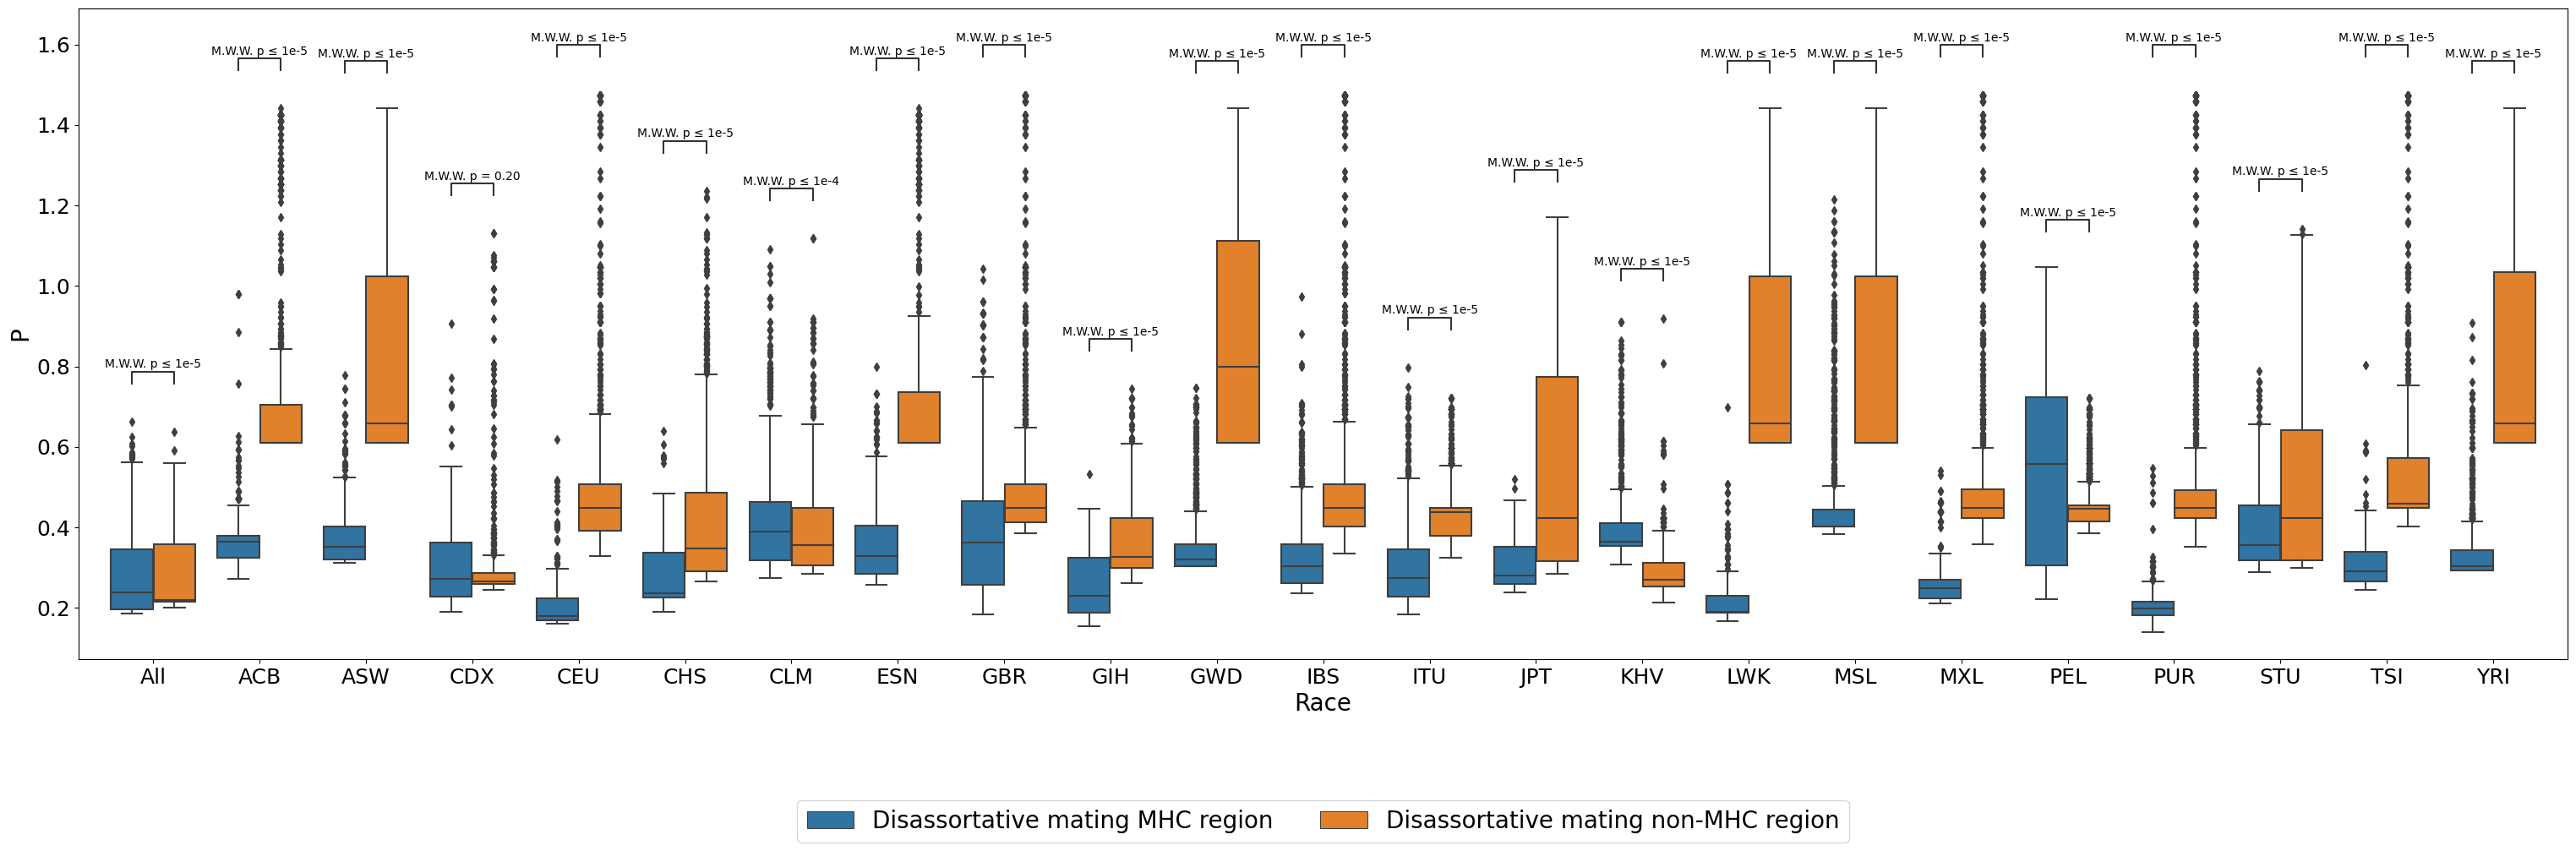

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

pairs = significanceComparisons
plt.figure(figsize=(38, 10))
fig_args = {'x': 'Race',
            'y': 'P',
            'hue': 'iscomplementary',
            'data': samplesdf,
            'order': orders,
            'hue_order': ['Disassortative mating MHC region', 'Disassortative mating non-MHC region'],
            'dodge': True}

configuration = {'test': 'Mann-Whitney',
                 'text_format': 'simple',
                 'comparisons_correction':"fdr_bh", 
                 'correction_format':"replace"
                 }

ax = sns.boxplot(**fig_args)

annotator = Annotator(ax, pairs, **fig_args)
annotator.configure(**configuration)
annotator.apply_test()
annotator.annotate()


ax.tick_params(axis='both', labelsize=18)
ax.set_xlabel("Race",fontsize=20)
ax.set_ylabel("P",fontsize=20)

# adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2,fontsize=20)
plt.savefig('pic4new.png', dpi=300, bbox_inches='tight')
